#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

#### Loading and preprocessing the data

In [2]:
#loads the dataset 
data=pd.read_csv('customer_segmentation_data.csv')

In [3]:
# Returns the first 5 rows of the data
data.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [4]:
# Gives the number the Observations(rows) & Features(columns) present in the dataset
data.shape

(1000, 9)

In [5]:
# Gives detailed innformation about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [6]:
# Gives statiscal information about the numerical columns in the dataset
data.describe()

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


In [7]:
# Gives the Number of null values in the dataset
data.isnull().sum()

id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

In [8]:
# drop the least important columns
data=data.drop(['id', 'preferred_category'], axis=1)

In [9]:
data.head()

,age,gender,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
0,38,Female,99342,90,3,24,113.53
1,21,Female,78852,60,2,42,41.93
2,60,Female,126573,30,2,28,424.36
3,40,Other,47099,74,9,5,991.93
4,65,Female,140621,21,3,25,347.08


In [10]:
# One-hot-encoding to convert the categorical column into numerical
data=pd.get_dummies(data, columns=['gender'])

In [11]:
data.head()

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Female,gender_Male,gender_Other
0,38,99342,90,3,24,113.53,True,False,False
1,21,78852,60,2,42,41.93,True,False,False
2,60,126573,30,2,28,424.36,True,False,False
3,40,47099,74,9,5,991.93,False,False,True
4,65,140621,21,3,25,347.08,True,False,False


In [12]:
data.isnull().sum()

age                     0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
last_purchase_amount    0
gender_Female           0
gender_Male             0
gender_Other            0
dtype: int64

#### Scaling the data

In [13]:
# scales the data with a mean of 0 & Standard deviation of 1.
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

In [14]:
# converting the scaled data from array to a Dataframe
scaled_data=pd.DataFrame(scaled_data, columns=data.columns)
scaled_data.head()

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Female,gender_Male,gender_Other
0,-0.384644,0.316868,1.358468,-0.865010,-0.182348,-1.281540,1.471243,-0.745124,-0.697054
1,-1.515362,-0.282016,0.321865,-1.215358,1.082005,-1.523763,1.471243,-0.745124,-0.697054
2,1.078639,1.112778,-0.714738,-1.215358,0.098620,-0.230005,1.471243,-0.745124,-0.697054
3,-0.251618,-1.210096,0.805613,1.237080,-1.516943,1.690080,-0.679697,-0.745124,1.434609
4,1.411203,1.523374,-1.025718,-0.865010,-0.112106,-0.491443,1.471243,-0.745124,-0.697054


#### Clustering the data using KMeans

In [15]:
# Finding the right number of clusters
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=39)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

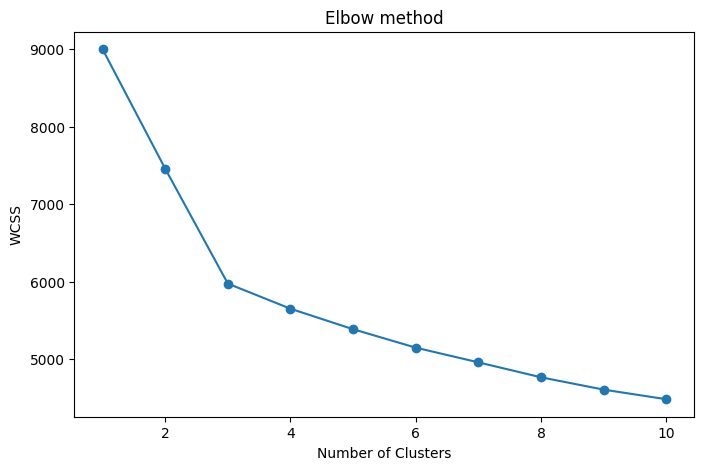

In [16]:
#plot the elbow graph
plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
# Performing clustering by choosing the optimal number of clusters
kmeans=KMeans(n_clusters=4, init='k-means++', random_state=39)
data['cluster']=kmeans.fit_predict(scaled_data)

In [18]:
data.head()

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Female,gender_Male,gender_Other,cluster
0,38,99342,90,3,24,113.53,True,False,False,2
1,21,78852,60,2,42,41.93,True,False,False,2
2,60,126573,30,2,28,424.36,True,False,False,2
3,40,47099,74,9,5,991.93,False,False,True,0
4,65,140621,21,3,25,347.08,True,False,False,2


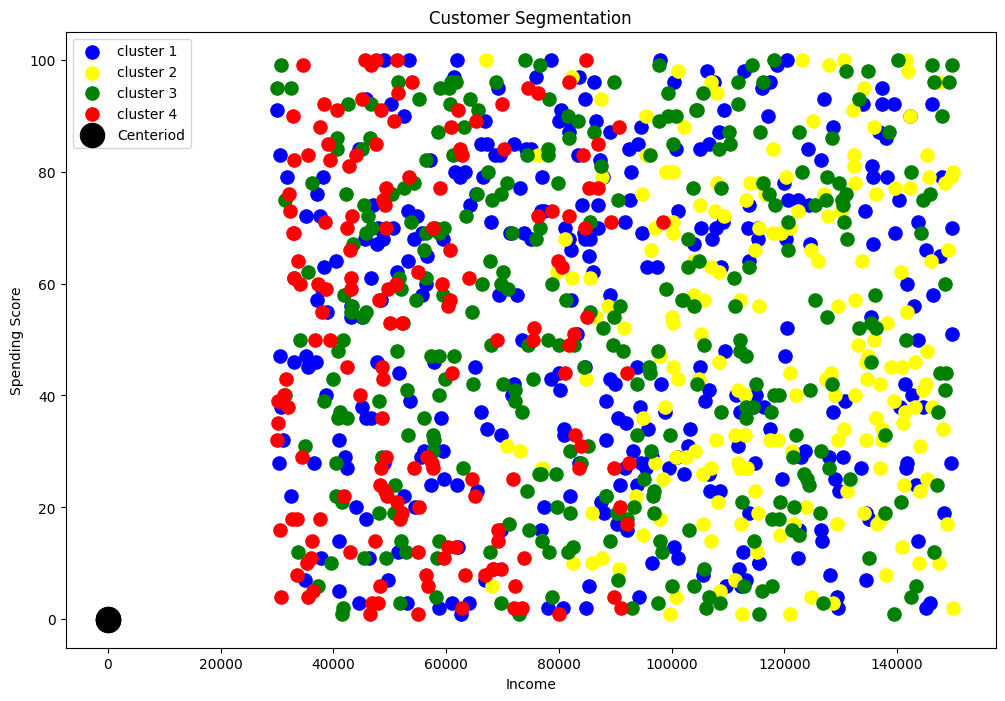

In [19]:
# Visualizing the clusters
plt.figure(figsize=(12,8))
plt.scatter(data[data['cluster']==0]['income'], data[data['cluster']==0]['spending_score'], s=90, c='blue', label='cluster 1')
plt.scatter(data[data['cluster']==1]['income'], data[data['cluster']==1]['spending_score'], s=90, c='yellow', label='cluster 2')
plt.scatter(data[data['cluster']==2]['income'], data[data['cluster']==2]['spending_score'], s=90, c='green', label='cluster 3')
plt.scatter(data[data['cluster']==3]['income'], data[data['cluster']==3]['spending_score'], s=90, c='red', label='cluster 4')

plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s=300, c='black', label='Centeriod')

plt.title('Customer Segmentation')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

#### Summarising the dataset

In [20]:
summary=data.groupby('cluster').mean()
summary

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Female,gender_Male,gender_Other
cluster,,,,,,,,,
0,45.165138,88522.703364,51.788991,5.510703,25.865443,521.438930,0.0,0.0,1.0
1,41.534031,117410.963351,48.958115,4.759162,28.356021,464.705079,0.0,1.0,0.0
2,43.876582,88018.104430,51.696203,5.316456,25.424051,458.018892,1.0,0.0,0.0
3,43.469880,56112.415663,48.572289,6.493976,28.240964,532.201807,0.0,1.0,0.0
